# Interacting with popular databases using Python

The primary mode of interaction with webpage is through the web communication protocol `HTTP` or `HTTPS` for encrypted. Within `HTTP`,
there are different methods for requesting and submitting information. The methods that we will be using today are `GET` and `POST` requests.

## HTTP Resquests

![Graphic example of an HTTP request](https://mdn.mozillademos.org/files/13821/HTTP_Request_Headers2.png)
Source: [Mozilla Developer](https://developer.mozilla.org/en-US/docs/Web/HTTP/Messages) 

* `POST` request sends headers information as well as additional form data content.
* `GET` request only sends headers information.

## HTTP Response

Every request is returned with a response. The response composed of a headers which contain information of the enclosing data
as well as additional meta instruction for the browsing session. 

![Graphic example of an HTTP response](https://mdn.mozillademos.org/files/13823/HTTP_Response_Headers2.png)
Source: [Mozilla Developer](https://developer.mozilla.org/en-US/docs/Web/HTTP/Messages) 

By convention, a request is successful when the response carry a `status` code of `200`. A request that could not be found
will receive a response with code `404`. A malformed or invalid request will received the response code `400`.

## HTTP API

An API is a collection of standard methods for requesting and submitting information with streamlined responses. Many website
use a standard API for getting information from their database then reorganizing them on the web document for the users.

Today, we are going to use Python interact directly with those API instead of having them display on a web document for browsing.


In [20]:
import requests
import json
import pandas as pd
from io import StringIO

`requests` is the recommended module for requesting and sending resources to a web-based API endpoint

`json` is the built-in module for working with data serialization and deserialization.

# UniProt REST API



In [21]:
uniprot_url = "https://www.uniprot.org/uploadlists"
headers = {
    "User-Agent": "Python, toan.phung@uq.net.au"
}
acc_file = "../data/testlist.txt"

`https://www.uniprot.org/uploadlists` is the url of the uniprot REST API that we will used to request information

`headers` is the metadata that should be included with every api requests for potential debugging purpose from uniprot admin

In [22]:
with open(acc_file, "rt") as source_acc:
    l = [i.strip() for i in source_acc]

Opening the file containing our list of Uniprot accession id and store as an string array


In [23]:
parameters = {
    "query": " ".join(l),
    "format": "tab",
    "from": "ACC,ID",
    "to": "REFSEQ_NT_ID"
}


From the `uploadlists` api endpoint, there are a few options we can choose.

For example, one can use Uniprot ability to convert input id format to id format in different databases.
Above, we are created a parameters dictionary to convert from Uniprot accession. The dictionary contain 4 keys.
- `query` value is a string constructed from the array above with each item joined by a space
- `format` the desired return file format
- `from` input format id type (uniprot acc and id)
- `to` output format id type (RefSeq nucleotide sequence id)


In [24]:
response = requests.get(uniprot_url, params=parameters, headers=headers)
print(response.status_code)

200


`response` is the variable containing the request result from Uniprot.

In [25]:
result_refseq_nt = pd.read_csv(StringIO(response.text), sep="\t")
result_refseq_nt.head()

,From,To
0,P25045,NM_001182805.1
1,Q07844,NM_001181854.1
2,P22147,NM_001181038.1
3,P39931,NM_001182137.1
4,P27692,NM_001182366.1


For saving the output from the operation, you can save directly from the response result or from the data frame.


In [26]:
# Directly from response
with open("../data/result_map.txt", "wb") as map_file:
    map_file.write(response.content)


In [27]:
# From pandas dataframe
result_refseq_nt.to_csv("../data/result_map.txt", sep="\t")


`result` store uniprot tabulated data in a `pandas` dataframe.

First columne is the original input id and the second column is the corresponding id in the RefSeq nucleotide database.

In [28]:
parameters["to"] = "P_REFSEQ_AC"
response = requests.get(uniprot_url, params=parameters, headers=headers)
result_refseq_ac = pd.read_csv(StringIO(response.text), sep="\t")
result_refseq_ac.head()

,From,To
0,P25045,NP_014025.1
1,Q07844,NP_013066.1
2,P22147,NP_011342.1
3,P39931,NP_013351.1
4,P27692,NP_013703.1


Above, we changed our query parameter to targeting RefSeq protein accession id instead.

---

Now what if we want to get more information from the Uniprot database instead of just doing id coversion.

In [29]:
extra_parameters = ["id", "entry name", "reviewed", "protein names", "organism", "sequence"]
parameters["to"] = "ACC"
parameters["columns"] = ",".join(extra_parameters)
print(parameters["columns"])

id,entry name,reviewed,protein names,organism,sequence


Adding a fifth key to our parameters named
- `columns` string composed of the columns name of desired data corresponding to the ids collection.
Each column name separated by ",". Above we are getting id, entry name, reviewed status, protein names, organism and 
protein sequence from Uniprot.

For all column name accessible through this mode, you can visit https://www.uniprot.org/help/uniprotkb_column_names


In [30]:
response = requests.get(uniprot_url, params=parameters, headers=headers)
result_uniprot = pd.read_csv(StringIO(response.text), sep="\t")
print(result_uniprot.columns)
result_uniprot.head()


Index(['Entry', 'Entry name', 'Status', 'Protein names', 'Organism',
       'Sequence',
       'yourlist:M201908086746803381A1F0E0DB47453E0216320D88A352J'],
      dtype='object')


,Entry,Entry name,Status,Protein names,Organism,Sequence,yourlist:M201908086746803381A1F0E0DB47453E0216320D88A352J
0,P25045,LCB1_YEAST,reviewed,Serine palmitoyltransferase 1 (SPT 1) (SPT1) (...,Saccharomyces cerevisiae (strain ATCC 204508 /...,MAHIPEVLPKSIPIPAFIVTTSSYLWYYFNLVLTQIPGGQFIVSYI...,P25045
1,Q07844,RIX7_YEAST,reviewed,Ribosome biogenesis ATPase RIX7,Saccharomyces cerevisiae (strain ATCC 204508 /...,MVKVKSKKNSLTSSLDNKIVDLIYRLLEEKTLDRKRSLRQESQGEE...,Q07844
2,P22147,XRN1_YEAST,reviewed,5'-3' exoribonuclease 1 (EC 3.1.13.-) (DNA str...,Saccharomyces cerevisiae (strain ATCC 204508 /...,MGIPKFFRYISERWPMILQLIEGTQIPEFDNLYLDMNSILHNCTHG...,P22147
3,P39931,SS120_YEAST,reviewed,Protein SSP120,Saccharomyces cerevisiae (strain ATCC 204508 /...,MRFLRGFVFSLAFTLYKVTATAEIGSEINVENEAPPDGLSWEEWHM...,P39931
4,P27692,SPT5_YEAST,reviewed,Transcription elongation factor SPT5 (Chromati...,Saccharomyces cerevisiae (strain ATCC 204508 /...,MSDNSDTNVSMQDHDQQFADPVVVPQSTDTKDENTSDKDTVDSGNV...,P27692


An example for a more extensive parameters is below


In [31]:
parameters = {
    "query": " ".join(l),
    "format": "tab",
    "from": "ACC,ID",
    "to": "ACC",
    "columns": "id,entry name,reviewed,protein names,genes,organism,length," \
                                   "organism-id,go-id,go(cellular component),comment(SUBCELLULAR LOCATION)," \
                                   "feature(TOPOLOGICAL_DOMAIN),feature(GLYCOSYLATION),comment(MASS SPECTROMETRY)," \
                                   "sequence,feature(ALTERNATIVE SEQUENCE),comment(ALTERNATIVE PRODUCTS) ",
}

response = requests.get(uniprot_url, params=parameters, headers=headers)

result_uniprot_extensive = pd.read_csv(StringIO(response.text), sep="\t")
print(result_uniprot_extensive.columns)
result_uniprot_extensive.head()

Index(['Entry', 'Entry name', 'Status', 'Protein names', 'Gene names',
       'Organism', 'Length', 'Organism ID', 'Gene ontology IDs',
       'Gene ontology (cellular component)', 'Subcellular location [CC]',
       'Topological domain', 'Glycosylation', 'Mass spectrometry', 'Sequence',
       'Alternative sequence', 'Alternative products (isoforms)',
       'yourlist:M201908086746803381A1F0E0DB47453E0216320D88A3564'],
      dtype='object')


,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Organism ID,Gene ontology IDs,Gene ontology (cellular component),Subcellular location [CC],Topological domain,Glycosylation,Mass spectrometry,Sequence,Alternative sequence,Alternative products (isoforms),yourlist:M201908086746803381A1F0E0DB47453E0216320D88A3564
0,P25045,LCB1_YEAST,reviewed,Serine palmitoyltransferase 1 (SPT 1) (SPT1) (...,LCB1 END8 TSC2 YMR296C,Saccharomyces cerevisiae (strain ATCC 204508 /...,558,559292,GO:0004758; GO:0005783; GO:0016021; GO:0017059...,SPOTS complex [GO:0035339]; endoplasmic reticu...,SUBCELLULAR LOCATION: Cytoplasm. Endoplasmic r...,TOPO_DOM 1 49 Lumenal. {ECO:0000269|PubMed:154...,NaN,NaN,MAHIPEVLPKSIPIPAFIVTTSSYLWYYFNLVLTQIPGGQFIVSYI...,NaN,NaN,P25045
1,Q07844,RIX7_YEAST,reviewed,Ribosome biogenesis ATPase RIX7,RIX7 YLL034C,Saccharomyces cerevisiae (strain ATCC 204508 /...,837,559292,GO:0000055; GO:0005524; GO:0005634; GO:0005730...,nucleolus [GO:0005730]; nucleus [GO:0005634]; ...,"SUBCELLULAR LOCATION: Nucleus, nucleolus {ECO:...",NaN,NaN,NaN,MVKVKSKKNSLTSSLDNKIVDLIYRLLEEKTLDRKRSLRQESQGEE...,NaN,NaN,Q07844
2,P22147,XRN1_YEAST,reviewed,5'-3' exoribonuclease 1 (EC 3.1.13.-) (DNA str...,XRN1 DST2 KEM1 RAR5 SEP1 SKI1 YGL173C G1645,Saccharomyces cerevisiae (strain ATCC 204508 /...,1528,559292,GO:0000184; GO:0000741; GO:0000932; GO:0000956...,P-body [GO:0000932]; cytoplasm [GO:0005737]; c...,"SUBCELLULAR LOCATION: Cytoplasm. Cytoplasm, pe...",NaN,NaN,NaN,MGIPKFFRYISERWPMILQLIEGTQIPEFDNLYLDMNSILHNCTHG...,NaN,NaN,P22147
3,P39931,SS120_YEAST,reviewed,Protein SSP120,SSP120 YLR250W L9672.4,Saccharomyces cerevisiae (strain ATCC 204508 /...,234,559292,GO:0000324; GO:0005509; GO:0005737; GO:0005793,cytoplasm [GO:0005737]; endoplasmic reticulum-...,NaN,NaN,NaN,NaN,MRFLRGFVFSLAFTLYKVTATAEIGSEINVENEAPPDGLSWEEWHM...,NaN,NaN,P39931
4,P27692,SPT5_YEAST,reviewed,Transcription elongation factor SPT5 (Chromati...,SPT5 YML010W YM9571.08,Saccharomyces cerevisiae (strain ATCC 204508 /...,1063,559292,GO:0000993; GO:0001042; GO:0001179; GO:0003677...,DSIF complex [GO:0032044]; mitochondrion [GO:0...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,NaN,NaN,NaN,MSDNSDTNVSMQDHDQQFADPVVVPQSTDTKDENTSDKDTVDSGNV...,NaN,NaN,P27692


Tabulated output from Uniprot does not give isoform sequence. If you want to get their sequence as well, you will have 
to work with fasta output instead of tabulated. An extra parameters is also needed is `include : "yes"`


In [32]:
parameters = {
    "query": " ".join(l),
    "format": "fasta",
    "from": "ACC,ID",
    "to": "ACC",
    "include": "yes"
}
response = requests.get(uniprot_url, params=parameters, headers=headers)

With the fasta file retrieved, we would still need to save it out.


In [33]:
with open("../data/all_isoforms.fasta", "wb") as fasta_file:
    fasta_file.write(response.content)
    

For query not using an id or accession but a more general search, the api endpoint will have to be changed to `https://www.uniprot.org/uniprot`
. Below we are constructing a new query for this endpoint.

In [34]:
uniprot_url = "https://www.uniprot.org/uniprot"
parameters = {
    "query": "glycoprotein",
    "format": "tab",
    "fil": 'organism:"Homo sapiens (Human) [9606]" AND reviewed:yes',
    "columns": "id,entry name,reviewed,protein names,genes,organism,length," \
                                   "organism-id,go-id,go(cellular component),comment(SUBCELLULAR LOCATION),"
}


Then execute the query in similar fashion.


In [35]:
response = requests.get(uniprot_url, params=parameters, headers=headers)
result_uniprot_glyco = pd.read_csv(StringIO(response.text), sep="\t")
result_uniprot_glyco.head()

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Organism ID,Gene ontology IDs,Gene ontology (cellular component),Subcellular location [CC]
0,P14384,CBPM_HUMAN,reviewed,Carboxypeptidase M (CPM) (EC 3.4.17.12),CPM,Homo sapiens (Human),443,9606,GO:0004180; GO:0004181; GO:0005576; GO:0005615...,anchored component of membrane [GO:0031225]; c...,SUBCELLULAR LOCATION: Cell membrane {ECO:00002...
1,P40259,CD79B_HUMAN,reviewed,B-cell antigen receptor complex-associated pro...,CD79B B29 IGB,Homo sapiens (Human),229,9606,GO:0002250; GO:0004888; GO:0005654; GO:0005794...,B cell receptor complex [GO:0019815]; Golgi ap...,SUBCELLULAR LOCATION: Cell membrane; Single-pa...
2,P15169,CBPN_HUMAN,reviewed,Carboxypeptidase N catalytic chain (CPN) (EC 3...,CPN1 ACBP,Homo sapiens (Human),458,9606,GO:0004181; GO:0005576; GO:0005615; GO:0006518...,extracellular region [GO:0005576]; extracellul...,"SUBCELLULAR LOCATION: Secreted, extracellular ..."
3,P35858,ALS_HUMAN,reviewed,Insulin-like growth factor-binding protein com...,IGFALS ALS,Homo sapiens (Human),605,9606,GO:0005520; GO:0005576; GO:0005615; GO:0005654...,extracellular exosome [GO:0070062]; extracellu...,"SUBCELLULAR LOCATION: Secreted, extracellular ..."
4,P30443,1A01_HUMAN,reviewed,"HLA class I histocompatibility antigen, A-1 al...",HLA-A HLAA,Homo sapiens (Human),365,9606,GO:0000139; GO:0001913; GO:0001916; GO:0002419...,ER to Golgi transport vesicle membrane [GO:001...,SUBCELLULAR LOCATION: Cell membrane {ECO:00002...


# NCBI API

Similar to UniProt, multiple NCBI APIs can be accessed through manipulation of the URL content.

In [36]:
result = pd.read_csv(StringIO(response.text), sep="\t")


`result` store uniprot tabulated data in a `pandas` dataframe.


In [37]:
eutil_path = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/"
query = result_refseq_ac["To"] + "[accn]"
query = "+OR+".join(query)
params = [
    "db=protein",
    "term={}".format(query),
    "usehistory=y"
]
url = "&".join(params)
headers["Content-Type"] = "application/x-www-form-urlencoded"

Now using the query above, we are performing a search in the protein database of uniprot with requests. However because of the URL length
we will have to use HTTP POST request instead of a simple GET request. The different between GET and POST is that beyond the URL and headers,
GET send no additional data. POST requests allows sending of information that are not suitable for URL.

In [38]:
res = requests.post(eutil_path + "esearch.fcgi", data=url, headers=headers)

Similar to a GET request, POST request result can be accessed at `content` and `text` attribute

In [39]:
res.content

b'<?xml version="1.0" encoding="UTF-8" ?>\n<!DOCTYPE eSearchResult PUBLIC "-//NLM//DTD esearch 20060628//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20060628/esearch.dtd">\n<eSearchResult><Count>926</Count><RetMax>20</RetMax><RetStart>0</RetStart><QueryKey>1</QueryKey><WebEnv>NCID_1_295303003_130.14.22.76_9001_1565229483_1409781304_0MetA0_S_MegaStore</WebEnv><IdList>\n<Id>398365665</Id>\n<Id>398365397</Id>\n<Id>398364771</Id>\n<Id>147921768</Id>\n<Id>42742305</Id>\n<Id>33438880</Id>\n<Id>6325371</Id>\n<Id>6325031</Id>\n<Id>6323953</Id>\n<Id>6322870</Id>\n<Id>6322406</Id>\n<Id>757873419</Id>\n<Id>398366661</Id>\n<Id>398366635</Id>\n<Id>398366631</Id>\n<Id>398366627</Id>\n<Id>398366603</Id>\n<Id>398366593</Id>\n<Id>398366587</Id>\n<Id>398366579</Id>\n</IdList><TranslationSet/><TranslationStack>   <TermSet>    <Term>NP_014025.1[accn]</Term>    <Field>accn</Field>    <Count>1</Count>    <Explode>N</Explode>   </TermSet>   <TermSet>    <Term>NP_013066.1[accn]</Term>    <Field>accn</Fiel

E-search would return an xml document containing the assigned ID for the query to be used for retrieving the result.
The assigned ID is stored in two part, one in the QueryKey tab, another in the WebEnv tab.

If the return result is large, it is suggested to manually grab 500 sequences at a time.

In [40]:
from bs4 import BeautifulSoup

There are many available packages for parsing of xml content. Today, we are going to use `BeautifulSoup`, a package traditionally for parsing webpage.


In [41]:
soup = BeautifulSoup(res.content, features="lxml-xml")
result_count = soup.find("Count").text
print(result_count)


926


First we load the xml data directly into an `BeautifulSoup` object. While HTML and XML is quite similar, there are differences
that require using of the`xml` parsing engine from the package `lxml` instead of the default parser.

With the `history` parameter enable, the `xml` file would contain two important information that we need to acquire, `QueryKey` and `WebEnv`.
`find` function will return the first element with the specified tags.

In [42]:
query_key = soup.find("QueryKey").text
web_env = soup.find("WebEnv").text

Now we can use E-fetch to retrieve the result. E-fetch can return data in different format.
More information on return datatype
https://www.ncbi.nlm.nih.gov/books/NBK25499/table/chapter4.T._valid_values_of__retmode_and/

E-fetch can be used to retrieve data directly without going through E-search. However, E-search can be used for more general purpose.

In [43]:
retrieve_params = [
    "db=protein",
    "query_key={}".format(query_key),
    "WebEnv={}".format(web_env),
    "rettype=gb",
    "retmode=xml",
    "retstart=0",
    "retmax=500"
]
retrieve_url = "&".join(retrieve_params)

We are retrieving 500 results at a time instead of everything at once per NCBI recommendation for longer queries. Below we created
the necessary E-Fetch url for retrieving our results.


In [44]:
del headers["Content-Type"]


In [45]:
res = requests.get(eutil_path + "efetch.fcgi?" + retrieve_url, headers=headers)


The output as we have requested is in `xml` format. However, this time, instead of looking for one instance of an elements,
we are looking for all instances of the `GBSeq` element which encapsulated each result. 

In [46]:
def ncbi_xml_parser(res):
    soup = BeautifulSoup(res.content, features="lxml-xml")
    entries = []
    for gb_seq in soup.find_all("GBSeq"):
        entry = {}
        entry["locus"] = gb_seq.find("GBSeq_locus").text
        entry["definition"] = gb_seq.find("GBSeq_definition").text
        entry["id"] = gb_seq.find("GBSeqid").text
        entry["org"] = gb_seq.find("GBSeq_organism").text
        entry["sequence"] = gb_seq.find("GBSeq_sequence").text
        entries.append(entry)
    return entries

entries = ncbi_xml_parser(res)

By storing the result as an array of dictionaries, we can then convert them into a dataframe if you are prefer to work in
the tabulated format. We can also use `Pandas` to convert the result into a dataframe with.

In [47]:
df = pd.DataFrame(entries)
df.head()

,definition,id,locus,org,sequence
0,uncharacterized protein YNR021W [Saccharomyces...,ref|NP_014418.3|,NP_014418,Saccharomyces cerevisiae S288C,msssifgpltgflervnslnapyqalsydeqkamtiwqrvkfynwt...
1,uncharacterized protein YGR054W [Saccharomyces...,ref|NP_011568.3|,NP_011568,Saccharomyces cerevisiae S288C,mssqfflktsqdielfqsyptfeqsntnskdfpvissvlspcgrfl...
2,uncharacterized protein YBR096W [Saccharomyces...,ref|NP_009654.3|,NP_009654,Saccharomyces cerevisiae S288C,mgvctifrwlfaayllssykslpgayfvrfyyyviqnlflpmftgf...
3,uncharacterized protein YPR010C-A [Saccharomyc...,ref|NP_001091638.1|,NP_001091638,Saccharomyces cerevisiae S288C,mrpaqlllntakktsggykipveltplflavgvalcsgtyftykkl...
4,uncharacterized protein YNL208W [Saccharomyces...,ref|NP_014191.2|,NP_014191,Saccharomyces cerevisiae S288C,msanefyssgqqgqynqqnnqertgapnngqygadngnpngerglf...


Now, as an example, we can rewrite what we have written above so that get every single result instead of just the first 500.

In [48]:
result_count = int(result_count)
entries = []
for i in range(0, result_count, 500):
    retrieve_params = [
        "db=protein",
        "query_key={}".format(query_key),
        "WebEnv={}".format(web_env),
        "rettype=gb",
        "retmode=xml",
        "retstart={}".format(i),
        "retmax={}".format(i + 500)
    ]
    retrieve_url = "&".join(retrieve_params)
    res = requests.get(eutil_path + "efetch.fcgi?" + retrieve_url, headers=headers)
    print("Retrieving with entries starting from {} with {}".format(i, res.url))
    entries += ncbi_xml_parser(res)

print(len(entries))
df = pd.DataFrame(entries)


Retrieving with entries starting from 0 with https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=protein&query_key=1&WebEnv=NCID_1_295303003_130.14.22.76_9001_1565229483_1409781304_0MetA0_S_MegaStore&rettype=gb&retmode=xml&retstart=0&retmax=500
Retrieving with entries starting from 500 with https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=protein&query_key=1&WebEnv=NCID_1_295303003_130.14.22.76_9001_1565229483_1409781304_0MetA0_S_MegaStore&rettype=gb&retmode=xml&retstart=500&retmax=1000
926


# The Human Protein Atlas

A more database focus on mapping of the human proteome to current knowledge at various depths.

Different to a straight forward API that return all data in a friendly format for `pandas`, the Human 
Protein Atlas, some of the data are not available in the API and had to be scrapped directly from the
webpage itself.

As an example, in this section, we are going to scrap information used for constructing the RNA expression
overview bar chart for PTEN in human tissue from this webpage https://www.proteinatlas.org/ENSG00000171862-PTEN/tissue .

One thing to note is that while your web browser can execute javascript, the python `requests` module does not.
This differences create different in a javascript-heavy webpage that you can see on a web browser and the html content
received by requests. On Chrome, you can view the request's content before the javascript content has been rendered by
going to `Menu > More tools > Developer tools > Network`. This tool allow you to record all request and response between
your browser and the webpage you are viewing. For the PTEN tissue webpage, the response content would be in the very first
request at the top of the tool.

In [49]:
atlas_url = "https://www.proteinatlas.org/ENSG00000171862-PTEN/tissue"

res = requests.get(atlas_url, headers=headers)
soup = BeautifulSoup(res.content, "lxml")
with open("test.html", "wb") as hm:
    hm.write(res.content)

The content from the chrome dev-tool should be similar to the content that we just request using the `requests` module, 
both without execution or reorganization by javascript.

As you might have noticed when viewing the rendered webpage on Chrome, each of these bar charts was an SVG image with 
individually inspectable elements. These were dynamically generated by D3.js, a javascript framework for data graphing.
When inspecting the response from dev-tool, we can see how the data for that graph were formatted and gave to the javascript graphing function 
`.barChart`.

Using `BeautifulSoup` we can filter for specific bar charts or those javascript elements containing function `.barchart`.

In [50]:
chart = ""
for i in soup.find_all("script"):
    if "$('#HPAChart').barChart" in i.text:
        chart = i.text
        break

First we isolate all elements that has a `script` tag since we are only looking at javascript within the document.
In this example, we only select for content of the script making up the HPA RNA expression barChart.

The content that we wanted to isolate is the input parameters of the `barChart` function, specifically the array of objects :
`[{"pos":1,"label":"Cerebral cortex", ... Samples: 3","url":"\/ENSG00000171862-PTEN\/tissue\/skin#rnaseq"}]`

Each of these objects has 4 attributes:
* `pos` the initial position of the relevant bar on the chart
* `label` the associated tissue name
* `value` the value to be drawn on the chart according the the y-axis scale
* `color` the color of the specific bar
* `tooltip` the data and format for tooltip triggering on mouse hover actions

In [51]:
import re

pattern = re.compile("(\[.+\]),")
data = pattern.search(chart)

In order to extract out this array, we use regular expression for matching exactly the content that we want.
The pattern we are using is `(\[.+\])`. `()` syntax is used to specify capture group separate from the whole pattern.
This pattern specifically only capture the brackets and their content.

This data can be accessed using the `group` method and an integer number. The number represent the order that the information
is captured. The number for the entire pattern is `0`, while our capture group is `1`.

Due to these extracted information being in string formatted, we have to convert them into appropriate Python data type for
further handling. Using the built-in module `json` we can convert this data into an array of Python dictionaries. 

In [52]:
data_array = json.loads(data.group(1))
print(data_array)

[{'pos': 1, 'label': 'Cerebral cortex', 'value': 33.3, 'color': '#6BA792', 'tooltip': 'Cerebral cortex: 33.3 TPM<br>Samples: 3', 'url': '/ENSG00000171862-PTEN/tissue/cerebral+cortex#rnaseq'}, {'pos': 2, 'label': 'Thyroid gland', 'value': 39.3, 'color': '#7F6A9C', 'tooltip': 'Thyroid gland: 39.3 TPM<br>Samples: 5', 'url': '/ENSG00000171862-PTEN/tissue/thyroid+gland#rnaseq'}, {'pos': 3, 'label': 'Parathyroid gland', 'value': 34, 'color': '#7F6A9C', 'tooltip': 'Parathyroid gland: 34 TPM<br>Samples: 1', 'url': '/ENSG00000171862-PTEN/tissue/parathyroid+gland#rnaseq'}, {'pos': 4, 'label': 'Adrenal gland', 'value': 36.4, 'color': '#7F6A9C', 'tooltip': 'Adrenal gland: 36.4 TPM<br>Samples: 3', 'url': '/ENSG00000171862-PTEN/tissue/adrenal+gland#rnaseq'}, {'pos': 5, 'label': 'Appendix', 'value': 48.4, 'color': '#A1A8AA', 'tooltip': 'Appendix: 48.4 TPM<br>Samples: 3', 'url': '/ENSG00000171862-PTEN/tissue/appendix#rnaseq'}, {'pos': 6, 'label': 'Bone marrow', 'value': 20.7, 'color': '#A1A8AA', 'tool

The data under tooltip is still in its html format and need to be parsed out. We begin by interating through each dictionary,
splitting the data at the linebreak html tag `<br>`. For each of the item we can also use regular expression to capture only 
the numeral values.

In [58]:
numeral_pattern = re.compile("\d+\.*\d*")
for i in range(len(data_array)):
    data_array[i]["value"] = float(data_array[i]["value"])
    tissue, sample = data_array[i]["tooltip"].split("<br>")
    print(tissue, sample)
    data_array[i]["sample"] = int(numeral_pattern.search(sample).group(0))
    data_array[i]["tpm"] = float(numeral_pattern.search(tissue).group(0))

Cerebral cortex: 33.3 TPM Samples: 3
Thyroid gland: 39.3 TPM Samples: 5
Parathyroid gland: 34 TPM Samples: 1
Adrenal gland: 36.4 TPM Samples: 3
Appendix: 48.4 TPM Samples: 3
Bone marrow: 20.7 TPM Samples: 4
Lymph node: 41.5 TPM Samples: 5
Tonsil: 32.5 TPM Samples: 5
Spleen: 55.7 TPM Samples: 5
Heart muscle: 13.3 TPM Samples: 4
Skeletal muscle: 4.2 TPM Samples: 5
Smooth muscle: 57.9 TPM Samples: 3
Lung: 35.1 TPM Samples: 9
Liver: 25.7 TPM Samples: 10
Gallbladder: 41.7 TPM Samples: 3
Pancreas: 5.7 TPM Samples: 2
Salivary gland: 10.3 TPM Samples: 3
Esophagus: 31.3 TPM Samples: 3
Stomach: 25.2 TPM Samples: 4
Duodenum: 27.5 TPM Samples: 2
Small intestine: 29.6 TPM Samples: 4
Colon: 31.3 TPM Samples: 13
Rectum: 30.6 TPM Samples: 4
Kidney: 25.9 TPM Samples: 9
Urinary bladder: 32.4 TPM Samples: 2
Testis: 67.4 TPM Samples: 10
Prostate: 37.9 TPM Samples: 9
Epididymis: 25.3 TPM Samples: 1
Seminal vesicle: 36.6 TPM Samples: 3
Fallopian tube: 39.4 TPM Samples: 5
Breast: 39.1 TPM Samples: 4
Cervix, 

We can then convert the array into a dataframe using pandas.

In [59]:
dframe = pd.DataFrame(data_array, columns=["label", "value", "sample", "tpm"])
dframe.head()

,label,value,sample,tpm
0,Cerebral cortex,33.3,3,33.3
1,Thyroid gland,39.3,5,39.3
2,Parathyroid gland,34.0,1,34.0
3,Adrenal gland,36.4,3,36.4
4,Appendix,48.4,3,48.4


([<matplotlib.axis.XTick at 0x20ead001080>,
 <a list of 37 Text xticklabel objects>)

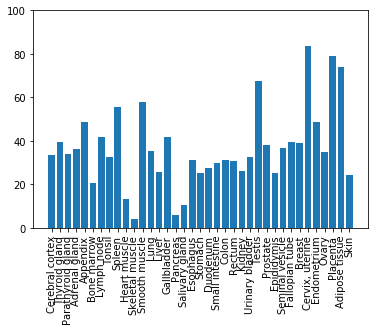

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(x=dframe["label"], height=dframe["value"])
plt.ylim(0, 100)
plt.xticks(dframe["label"], rotation="vertical")